# Bank Marketing Analysis and Modeling

***周知瑞, Phone: +86 18684886503, Mail: evilpsycho42@gmail.com***

## Competition Background

>+ Task

>You are provided with a dataset which is related to direct marketing campaigns (phone calls) of a banking institution. 

>The business problem is to predict whether the client will subscribe to a term deposit. 

>Participants are expected to undertake a thorough analysis of the dataset and build a prediction model to solve this business problem.  

>Business suggestions are welcomed but not mandatory.  

>Participants will be required to submit analysis along with modelling/algorithm design and validation for judging.  

>The judging panel will assess entries in accordance with the competition requirements and select up to 10 finalists who will progress to complete a presentation.  

## Contents

### 1. Explore Data and Analysis
+ 1.1 Overview
+ 1.2 Missing value
+ 1.3 Bank client information
+ 1.4 Related with the last contact of the current campaign
+ 1.5 Social and economic context attributes
+ 1.6 other

### 2. Data Preprocessing and Feature Engineering
+ 2.1 train, test split
+ 2.2 feature engineering
+ 2.3 outlier
+ 2.4 resample

### 3. Model Development and Evaluation

+ 3.1 machine learning model
+ 3.2 deep learning model


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels as sm
from sklearn.metrics import pairwise, mutual_info_score

%matplotlib inline
warnings.filterwarnings('ignore')
data = pd.read_csv('./bank-additional-train.csv')

### 1.1 Dataset Overview

In [35]:
print(f"data size: {data.shape}")
print((f'data attributes: {", ".join(data.columns.tolist())}'))

data size: (37069, 21)
data attributes: age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y


#### Attribute Information:

+ Bank client data:
 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
+ Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - ***Duration***: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
+  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
+  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

+  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [29]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,management,married,professional.course,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,41,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,32,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3,37,admin.,married,high.school,no,unknown,unknown,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
4,38,admin.,divorced,university.degree,no,no,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


**For better analysis and modeling, we map the target 'y' to {0, 1}, 1 means 'yes' and 0 means 'no'.**

In [38]:
data['y'] = data['y'].map({"yes": 1, "no": 0})
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.043783,258.374868,2.573552,962.543419,0.172570,0.082759,93.575098,-40.502147,3.622370,5167.150813,0.112250
std,10.395798,260.203020,2.786845,186.740644,0.494031,1.571270,0.579297,4.630409,1.733892,72.168914,0.315678
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


**the mean of 'y' is 11.2%, this is an imbalance classification problem.**

### 1.2 Missing value

Luckily, there is no missing value.

In [40]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 1.3 Bank client information

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Age

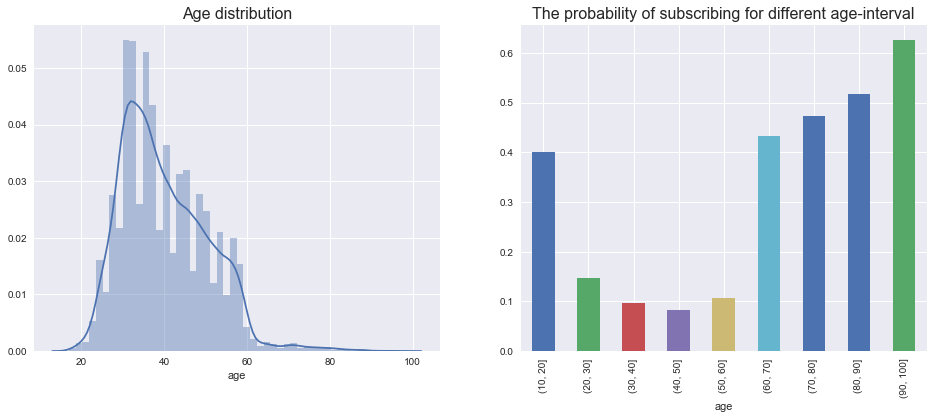

In [113]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(data.age, ax=axes[0])
axes[0].set_title('Age distribution', size=16)

data.groupby(pd.cut(data.age, range(10, 110, 10)).astype(str))['y'].mean().plot(kind='bar', ax=axes[1])
axes[1].set_title('The probability of subscribing for different age-interval', size=16)

**Insights:**
+ The age range of clients is mainly between 20 and 60 years old.
+ Youth(10-20) and old people(60+) have a higher probability of subscirbed a term deposit.

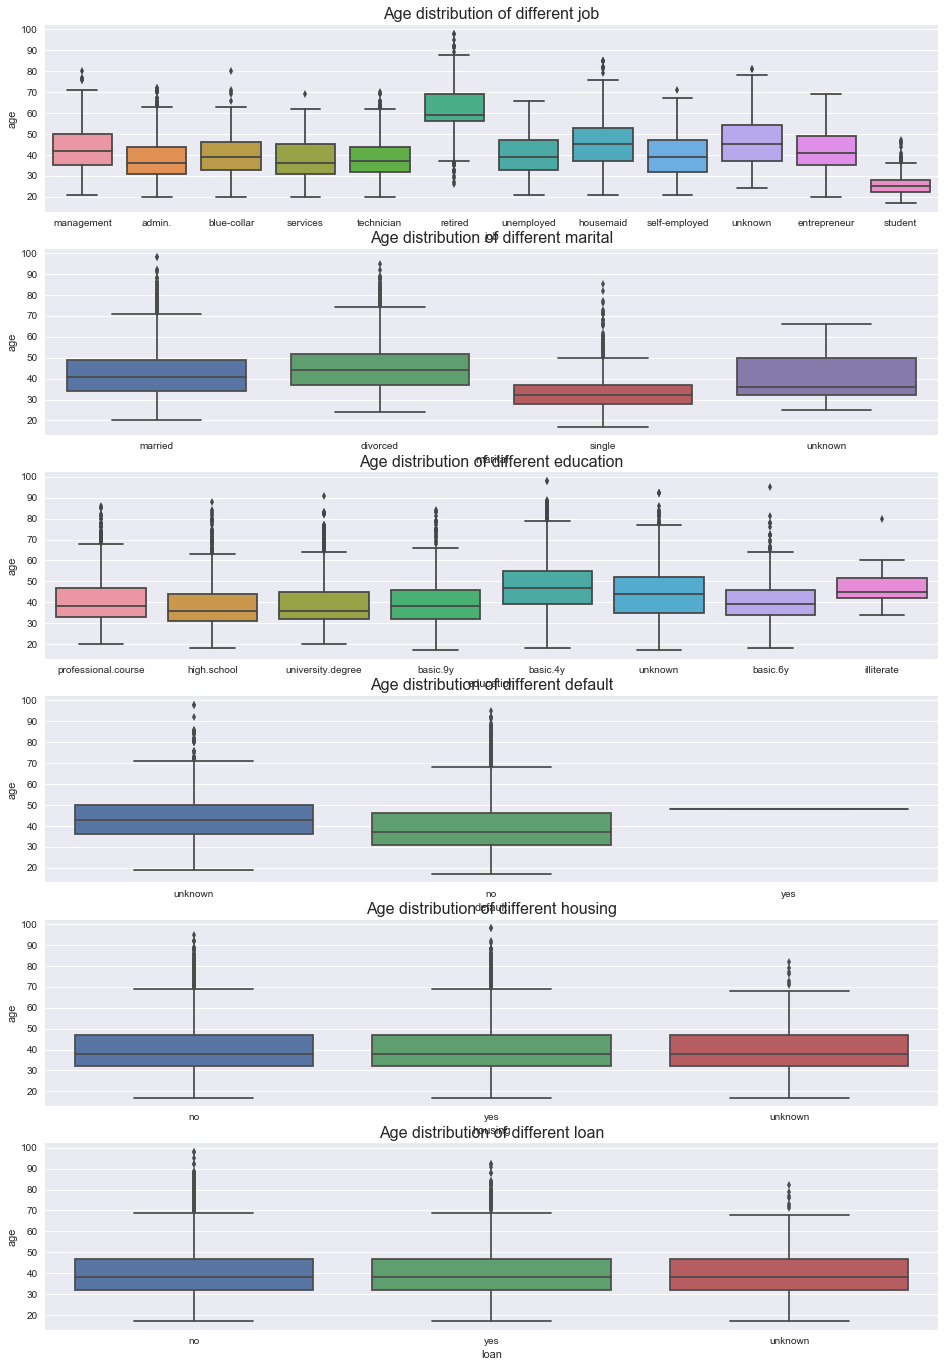

In [135]:
f, ax = plt.subplots(ncols=1, nrows=6, figsize=(16, 24))

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',]

for i, c in enumerate(cols):
    sns.boxplot(x=c, y='age', data=data, ax=ax[i])
    ax[i].set_title(f'Age distribution of different {c}', size=16)

**Insights:**
+ It seems that there is no relationship between ***age*** and ***{loan, housing, default}***
+ The clients whoes age less than 50 and job == 'retired' may be outlier samples.
+ Maybe we can use the age zone to separate the divorced and widows.

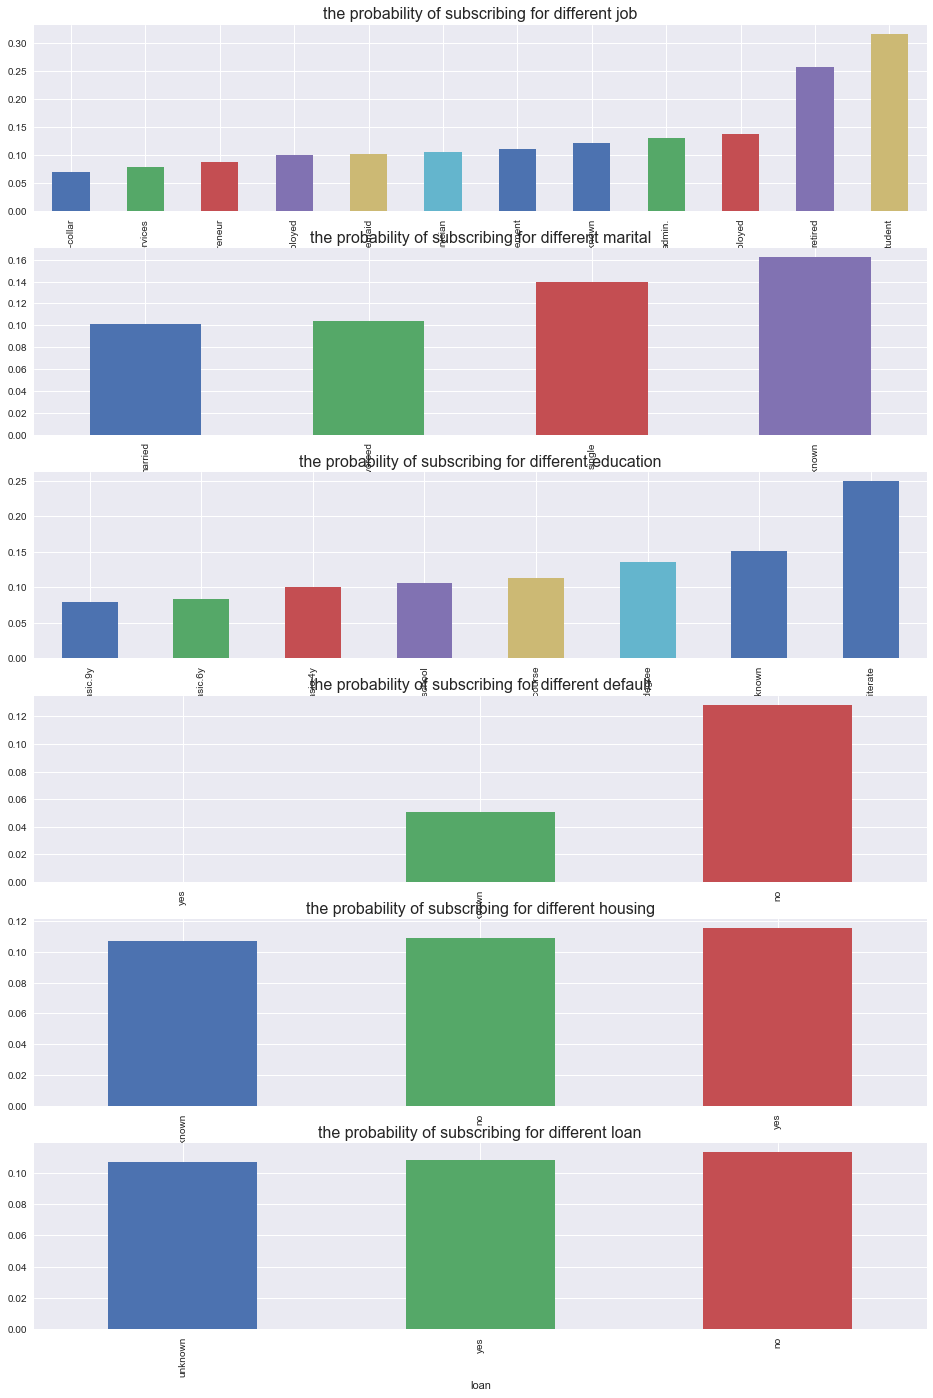

In [136]:
f, ax = plt.subplots(ncols=1, nrows=6, figsize=(16, 24))

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',]

for i, c in enumerate(cols):
    data.groupby(c)['y'].mean().sort_values().plot(ax=ax[i], kind='bar')
    ax[i].set_title(f'the probability of subscribing for different {c}', size=16)

***Insights***

+ Married or Divorced has nothing to do with subscribing.
+ Single and married-UNKNOWN clients have higher probability of subsribing.
+ Low degree, high degree and edu-UNKOWN clients have higher probability of subsribing.
+ Attribute: housing and load has very low correlation with subsribing.

### 1.4 Last concact

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - ***Duration***: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, ***this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.***

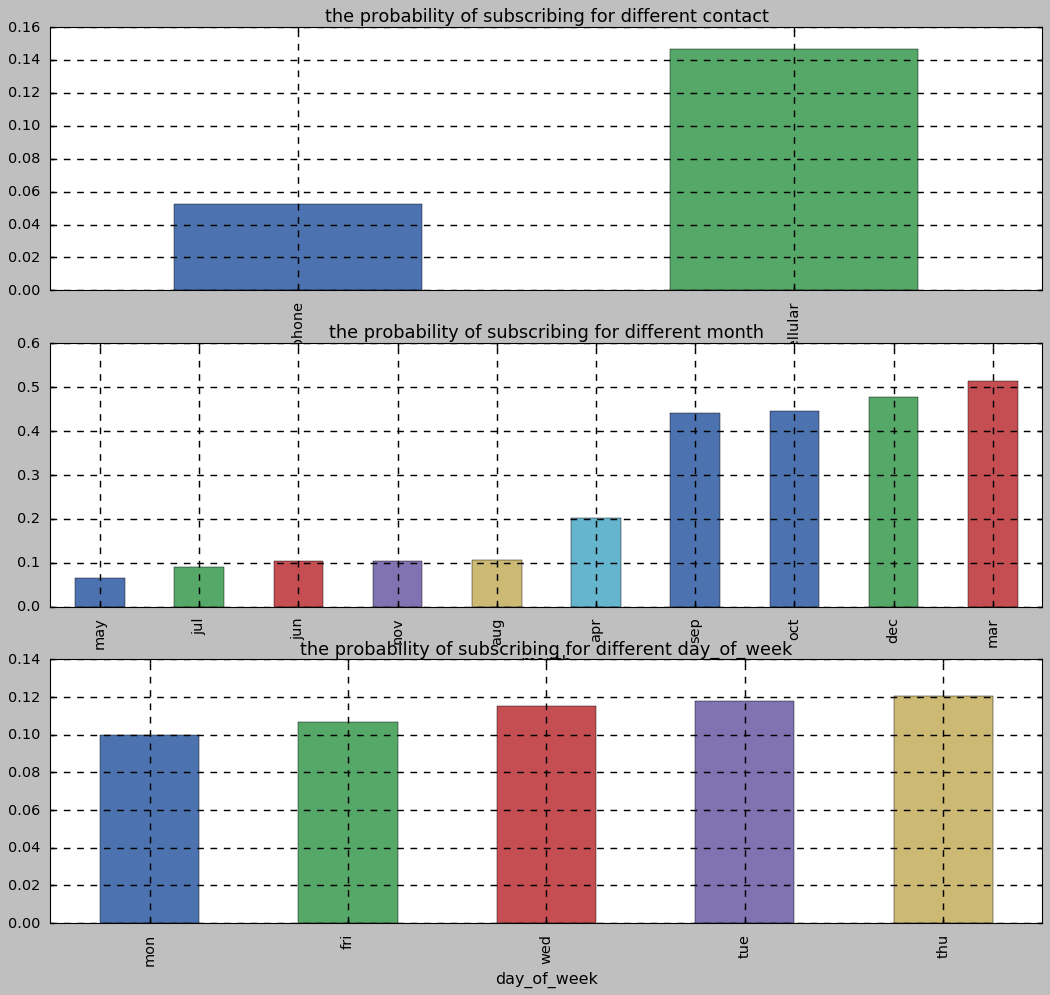

In [180]:
f, ax = plt.subplots(ncols=1, nrows=3, figsize=(16, 14))
plt.style.use("seaborn-deep")
cols = ['contact', 'month', 'day_of_week',]

for i, c in enumerate(cols):
    data.groupby(c)['y'].mean().sort_values().plot(ax=ax[i], kind='bar')
    ax[i].set_title(f'the probability of subscribing for different {c}', size=16)

***exploration month***

In [188]:
target_month = ['sep', 'oct', 'dec', 'mar']
data['month_exp'] = data['month'].apply(lambda x: 1 if x in target_month else 0)

data[data.month_exp == 1].describe() / data[data.month_exp == 0].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_exp
count,0.051066,0.051066,0.051066,0.051066,0.051066,0.051066,0.051066,0.051066,0.051066,0.051066,0.051066,0.051066
mean,1.082104,1.109856,0.702981,0.799228,4.392466,-11.119272,0.995258,0.896381,0.277785,0.970352,4.938338,inf
std,1.652572,1.111464,0.510077,2.563518,2.072839,0.686163,1.406534,1.999732,0.460352,0.808486,1.707851,NaN
min,1.000000,inf,1.000000,inf,NaN,1.000000,1.001931,0.984252,0.998425,1.000000,NaN,inf
25%,0.937500,1.247525,1.000000,1.000000,NaN,1.888889,0.993081,0.946136,0.515302,0.982271,NaN,inf
50%,1.000000,1.174157,0.500000,1.000000,NaN,-1.636364,0.988554,0.832536,0.160181,0.965684,NaN,inf
75%,1.170213,1.072327,0.666667,1.000000,inf,-0.785714,0.997915,0.818681,0.196936,0.960865,inf,inf
max,1.065217,0.667751,0.339286,1.000000,0.714286,-0.071429,0.998248,0.893688,1.015091,0.993822,1.000000,inf


The age, duration, etc. distribution of the two different types of months is basically the same, but the target month {'sep', 'oct', 'dec', 'mar'} have significantly higher probability of subscribing.

In [189]:
data.drop('month_exp', inplace=True, axis=1)

In [195]:
data[['duration', 'y']].corr()

,duration,y
duration,1.000000,0.402871
y,0.402871,1.000000


***Insights:***
+ cellular have significantly higher success rates than telephone.
+ The age, duration, etc. distribution of the two different types of months is basically the same, but the target month {'sep', 'oct', 'dec', 'mar'} have significantly higher probability of subscribing.
+ duration has a strong positive correlation with y, maybe we can get a stronger model by using transfer learning. 


### 1.5 Social and economic context

 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

In [198]:
social_economic_y = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

data[social_economic_y].corr()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
emp.var.rate,1.000000,0.776473,0.193872,0.972425,0.907549,-0.299748
cons.price.idx,0.776473,1.000000,0.057214,0.689771,0.524796,-0.138408
cons.conf.idx,0.193872,0.057214,1.000000,0.275447,0.098479,0.057343
euribor3m,0.972425,0.689771,0.275447,1.000000,0.945400,-0.308947
nr.employed,0.907549,0.524796,0.098479,0.945400,1.000000,-0.356129
y,-0.299748,-0.138408,0.057343,-0.308947,-0.356129,1.000000


***Insight:***
+ 'emp.var.rate', 'euribor3m' and 'nr.employed' have collinearity, and negative correlation with y.

### 1.6 Other

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

In [201]:
other = ['campaign', 'pdays','previous', 'poutcome', 'y']
data[other].corr()

,campaign,pdays,previous,y
campaign,1.000000,0.052963,-0.079084,-0.067204
pdays,0.052963,1.000000,-0.588669,-0.327765
previous,-0.079084,-0.588669,1.000000,0.231958
y,-0.067204,-0.327765,0.231958,1.000000


In [202]:
data.groupby('poutcome')['y'].mean()

poutcome
failure        0.142932
nonexistent    0.087763
success        0.653940
Name: y, dtype: float64

***Insight:***:
+ previous is more, last concact is closer, success rates is highter.
+ the outcome of the previous marketing campaign can help us target high success customers。

## 2. Data Preprocessing

### 2.1 train, test split

we set test dataset size = 20.0%

In [95]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('./bank-additional-train.csv')
data['y'] = data['y'].map({"yes": 1, "no": 0})
train_idx, test_idx = train_test_split(range(data.shape[0]), test_size=0.2, random_state=6)

### 2.2 feature

drop duration

In [96]:
data.drop('duration', axis=1, inplace=True)
train = data.iloc[train_idx].reset_index(drop=True)
test  = data.iloc[test_idx].reset_index(drop=True)

In [97]:
from sklearn.preprocessing import LabelEncoder
for col, dtype in zip(data.columns[:-1], data.dtypes[:-1]):
    if dtype == object:
        print(f'processing col: {col}, dtype: {dtype}')
        le = LabelEncoder().fit(data[col])
        train[col] = le.transform(train[col])
        test[col]  = le.transform(test[col])
        

processing col: job, dtype: object
processing col: marital, dtype: object
processing col: education, dtype: object
processing col: default, dtype: object
processing col: housing, dtype: object
processing col: loan, dtype: object
processing col: contact, dtype: object
processing col: month, dtype: object
processing col: day_of_week, dtype: object
processing col: poutcome, dtype: object


### 2.3 resample

In [98]:
train_x, train_y = train.iloc[:, :-1].values, train['y'].values
test_x, test_y   = test.iloc[:, :-1].values, test['y'].values
features = train.columns.tolist()

def oversample(x, y):
    n = (y==0).sum() - (y==1).sum()
    idx = np.random.choice(np.where(y==1)[0], n)
    x_over = x[idx]
    y_over = y[idx]
    return np.concatenate([x, x_over], axis=0), np.concatenate([y, y_over], axis=0)

train_x, train_y = oversample(train_x, train_y)

## 3. Model Development
### Boosting Model
+ 3.1 Parameter Search
+ 3.2 Classication Threshold Search [to do]

### DeepLearning Model[to do]
+ 3.3 DNN
+ 3.4 Transfer Learning / Muti-Target Learning

In [41]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [44]:
estimator = lgb.LGBMRegressor(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': range(180, 260, 20)
}

gbm = GridSearchCV(estimator, param_grid, cv=4)
gbm.fit(train_x, train_y)
gbm.best_estimator_

LGBMRegressor(boosting_type='gbdt', colsample_bytree=1, learning_rate=0.3,
       max_bin=255, max_depth=-1, min_child_samples=10, min_child_weight=5,
       min_split_gain=0, n_estimators=200, nthread=-1, num_leaves=31,
       objective='regression', reg_alpha=0, reg_lambda=0, seed=0,
       silent=True, subsample=1, subsample_for_bin=50000, subsample_freq=1)

In [53]:
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.03],
    'n_estimators': range(280, 500, 40)
}

gbm = GridSearchCV(estimator, param_grid, cv=4)
gbm.fit(train_x, train_y)
gbm.best_estimator_

LGBMRegressor(boosting_type='gbdt', colsample_bytree=1, learning_rate=0.03,
       max_bin=255, max_depth=-1, min_child_samples=10, min_child_weight=5,
       min_split_gain=0, n_estimators=480, nthread=-1, num_leaves=31,
       objective='regression', reg_alpha=0, reg_lambda=0, seed=0,
       silent=True, subsample=1, subsample_for_bin=50000, subsample_freq=1)

In [101]:
model = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.03, n_estimators=500)
model.fit(train_x, train_y, feature_name=features[:-1], )

LGBMRegressor(boosting_type='gbdt', colsample_bytree=1, learning_rate=0.03,
       max_bin=255, max_depth=-1, min_child_samples=10, min_child_weight=5,
       min_split_gain=0, n_estimators=500, nthread=-1, num_leaves=31,
       objective='regression', reg_alpha=0, reg_lambda=0, seed=0,
       silent=True, subsample=1, subsample_for_bin=50000, subsample_freq=1)

### Evaluate

In [102]:
pred_y = model.predict(test_x)

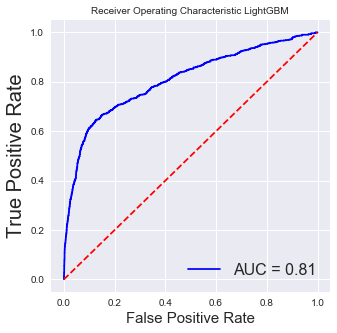

In [103]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (5,5))
fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)

ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic LightGBM ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

In [151]:
from sklearn.metrics import recall_score, precision_score, f1_score

threshold = 0.69
pred_y = model.predict(test_x)
pred_y[np.where(pred_y<threshold)] = 0
pred_y[np.where(pred_y>=threshold)] = 1

print(f'f1: {f1_score(test_y, pred_y):.4f}, recall:{recall_score(test_y, pred_y): .4f}, precision:{precision_score(test_y, pred_y):.4f}')

f1: 0.5172, recall: 0.5421, precision:0.4945
